In [3]:
import numpy as np
from tqdm import tqdm
import time
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append("../..")
from ecit import *


In [ ]:
n_nodes = 6
dense = 0.5
t = 100
n_list = [800,1600,2400,3200,4000]
ensCIT = [(kcit, 400, p_alpha175),
          (kcit, 400, p_cauchy),
          (rcit, 1, p_cauchy)]

results = {}

for cit, k, p_ensemble in ensCIT:

    print(f'---k={k}---')

    result = []

    for n in n_list:
        if cit != kcit or k!=1 or n<6000:
            start_time = time.time()
            res = []
            resabs = []
            for i in tqdm(range(t), desc="Processing"):
                np.random.seed(i+n)
                random.seed(i+n)
                data, tcg = generate_graph_samples(n,n_nodes,dense)
                cg = epc(data, cit, p_ensemble, k if k < 100 else int(n/k), show_progress=False)
                cg = cg.G.graph
                resabs.append(compute_SHD(np.abs(cg), np.abs(tcg)))
                res.append(compute_SHD(cg, tcg))
            end_time = time.time()
            result.append([np.mean(res), np.std(res), np.mean(resabs), np.std(resabs), end_time - start_time])

    print('---')
    
    results[cit.__name__ + str(k) + p_ensemble.__name__] = np.array(result).T.tolist()

results

---k=400---


Processing: 100%|██████████| 100/100 [3:44:55<00:00, 134.95s/it] 


---
---k=400---


Processing: 100%|██████████| 100/100 [2:27:56<00:00, 88.77s/it]  


---
---k=1---


Processing: 100%|██████████| 100/100 [15:38<00:00,  9.38s/it]

---


{'kcit400p_alpha175': [[9.29, 8.74, 8.65, 8.28, 8.2],
  [2.16469397375241,
   1.9930880562584286,
   2.495495942693556,
   2.3709913538433667,
   2.1023796041628637],
  [4.77, 4.03, 3.84, 3.49, 3.22],
  [2.4853772349484493,
   2.2823452850083834,
   2.3482759633399137,
   2.229327252782776,
   2.0078844588272506],
  [1954.165822982788,
   4233.933963060379,
   6709.804012060165,
   10062.846825122833,
   13495.265300989151]],
 'kcit400p_cauchy': [[9.25, 8.99, 9.04, 8.9, 8.84],
  [2.1788758569500923,
   1.9874355335456795,
   2.185955168799214,
   2.483948469674844,
   2.0480234373658908],
  [5.02, 4.74, 4.67, 4.49, 4.34],
  [2.4697368280851304,
   2.5440911933340753,
   2.494213302827166,
   2.7110698995046216,
   2.5854206620973694],
  [1482.786894083023,
   3130.484867811203,
   4855.297700166702,
   6754.243012666702,
   8876.689225912094]],
 'rcit1p_cauchy': [[9.53, 8.93, 9.25, 9.05, 9.24],
  [2.114024597775532,
   2.192053831455788,
   2.0706279240848655,
   2.308137777516758,
   

In [ ]:
n_nodes = 6
dense = 0.5
t = 100
n_list = [800,1600,2400,3200,4000]
ensCIT = [(kcit, 1, p_cauchy)]

results = {}

for cit, k, p_ensemble in ensCIT:

    print(f'---k={k}---')

    result = []

    for n in n_list:
        if cit != kcit or k!=1 or n<6000:
            start_time = time.time()
            res = []
            resabs = []
            for i in tqdm(range(t), desc="Processing"):
                np.random.seed(i+n)
                random.seed(i+n)
                data, tcg = generate_graph_samples(n,n_nodes,dense)
                cg = epc(data, cit, p_ensemble, k if k < 100 else int(n/k), show_progress=False)
                cg = cg.G.graph
                resabs.append(compute_SHD(np.abs(cg), np.abs(tcg)))
                res.append(compute_SHD(cg, tcg))
            end_time = time.time()
            result.append([np.mean(res), np.std(res), np.mean(resabs), np.std(resabs), end_time - start_time])

    print('---')
    
    results[cit.__name__ + str(k) + p_ensemble.__name__] = np.array(result).T.tolist()

results

---k=1---


Processing: 100%|██████████| 100/100 [91:13:00<00:00, 3283.80s/it]   

---


{'kcit1p_cauchy': [[9.28, 8.97, 8.92, 9.02, 8.9],
  [2.379411691994473,
   2.1792429878285717,
   2.532508637695043,
   2.395746230300697,
   2.2825424421026654],
  [4.98, 4.69, 4.52, 4.49, 4.39],
  [2.57285833267205,
   2.741149393958673,
   2.7694042680692177,
   2.7221131497423103,
   2.6866149705530935],
  [4105.8086540699005,
   22363.325807094574,
   73868.41047906876,
   173140.55101513863,
   328380.3694579601]]}

---

In [4]:
results = {
  'KCIT': [[9.28, 8.97, 8.92, 9.02, 8.9],
  [2.379411691994473,
   2.1792429878285717,
   2.532508637695043,
   2.395746230300697,
   2.2825424421026654],
  [4.98, 4.69, 4.52, 4.49, 4.39],
  [2.57285833267205,
   2.741149393958673,
   2.7694042680692177,
   2.7221131497423103,
   2.6866149705530935],
  [4105.8086540699005,
   22363.325807094574,
   73868.41047906876,
   173140.55101513863,
   328380.3694579601]],
  'RCIT': [[9.53, 8.93, 9.25, 9.05, 9.24],
  [2.114024597775532,
   2.192053831455788,
   2.0706279240848655,
   2.308137777516758,
   2.0105720578979507],
  [6.41, 5.66, 5.58, 5.41, 5.5],
  [2.285147697633569,
   2.5660085736411715,
   2.4543023448629957,
   2.6042081330031976,
   2.5199206336708304],
  [491.6821138858795,
   575.5539748668671,
   701.1148881912231,
   791.6734635829926,
   938.1539180278778]],
  r"EKCIT ($\alpha=1.75$)": [[9.29, 8.74, 8.65, 8.28, 8.2],
  [2.16469397375241,
   1.9930880562584286,
   2.495495942693556,
   2.3709913538433667,
   2.1023796041628637],
  [4.77, 4.03, 3.84, 3.49, 3.22],
  [2.4853772349484493,
   2.2823452850083834,
   2.3482759633399137,
   2.229327252782776,
   2.0078844588272506],
  [1954.165822982788,
   4233.933963060379,
   6709.804012060165,
   10062.846825122833,
   13495.265300989151]],
  r"EKCIT ($\alpha=2$)": [[9.25, 8.99, 9.04, 8.9, 8.84],
  [2.1788758569500923,
   1.9874355335456795,
   2.185955168799214,
   2.483948469674844,
   2.0480234373658908],
  [5.02, 4.74, 4.67, 4.49, 4.34],
  [2.4697368280851304,
   2.5440911933340753,
   2.494213302827166,
   2.7110698995046216,
   2.5854206620973694],
  [1482.786894083023,
   3130.484867811203,
   4855.297700166702,
   6754.243012666702,
   8876.689225912094]]}

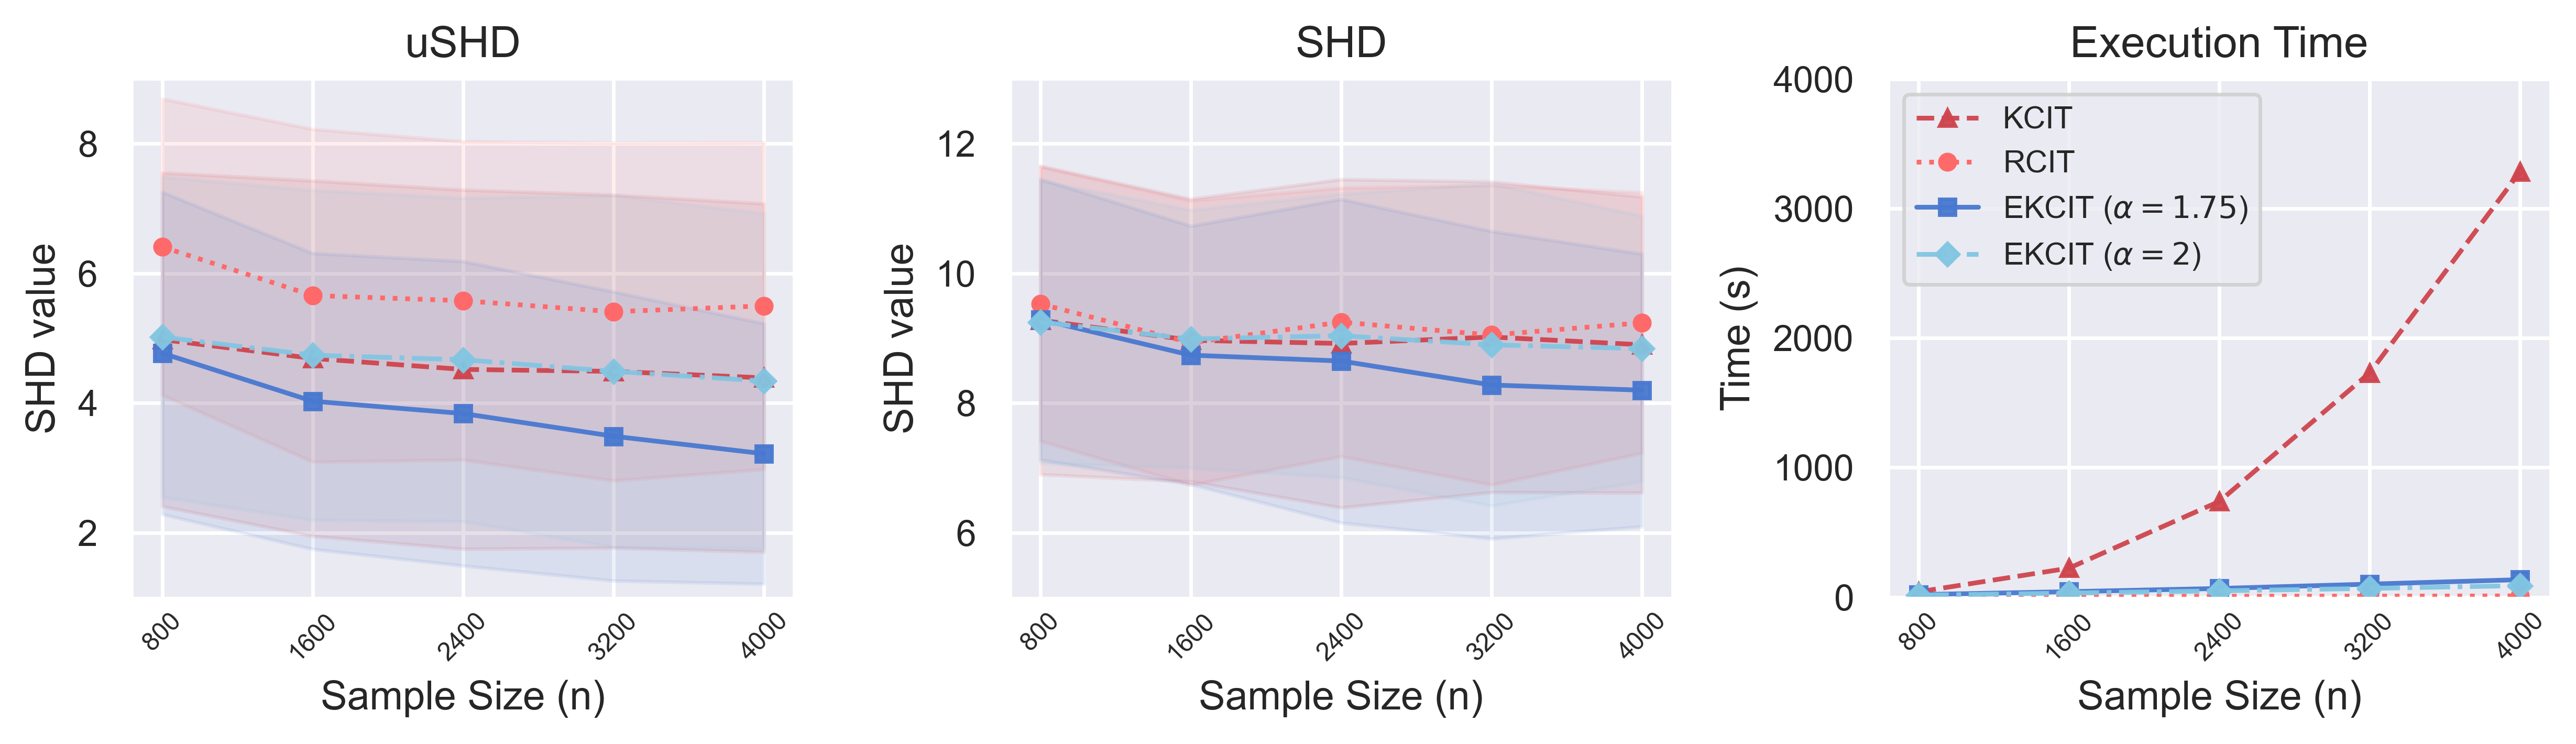

In [28]:
n_list = [800,1600,2400,3200,4000]
def show_results(results, n_list):
    
    fig, axes = plt.subplots(1, 3, figsize=(10, 3), dpi=500)
    ax_uSHD, ax_SHD, ax_tim = axes

    linestyles = ['--', ':', '-', '-.']
    markers = ['^', 'o', 's', 'D']
    colors = ["#cf444d", "#ff6969", sns.color_palette("muted")[0], sns.color_palette("muted")[9]]
    alphas = [0.95, 1, 0.95, 0.95]
    markersize = 4.2
    linewidth = 1.3
    
    for idx, (label, result) in enumerate(results.items()):
        SHD, SHD_std, uSHD, uSHD_std, tim = result[0], result[1], result[2], result[3], result[4]

        linestyle = linestyles[idx % len(linestyles)]  # 循环使用线型
        marker = markers[idx % len(markers)]  # 循环使用标记
        color = colors[idx % len(colors)]  # 循环使用颜色
        alpha = alphas[idx % len(alphas)]

        x_vals = n_list

        ax_uSHD.plot(x_vals, uSHD, alpha=alpha, label=label, linestyle=linestyle, marker=marker, markersize=markersize, linewidth=linewidth, color=color)
        ax_uSHD.fill_between(x_vals,
                    np.array(uSHD) - np.array(uSHD_std),
                    np.array(uSHD) + np.array(uSHD_std),
                    color=color, alpha=0.1)

        ax_SHD.plot(x_vals, SHD, alpha=alpha, label=label, linestyle=linestyle, marker=marker, markersize=markersize, linewidth=linewidth, color=color)
        ax_SHD.fill_between(x_vals,
                    np.array(SHD) - np.array(SHD_std),
                    np.array(SHD) + np.array(SHD_std),
                    color=color, alpha=0.1)
        
        ax_tim.plot(x_vals, np.array(tim)/100, alpha=alpha, label=label, linestyle=linestyle, marker=marker, markersize=markersize, linewidth=linewidth, color=color)


    ax_uSHD.set_title("uSHD", fontsize=12)
    ax_uSHD.set_ylabel("SHD value", fontsize=11)
    ax_uSHD.set_xlabel("Sample Size (n)", fontsize=11)
    ax_uSHD.set_xticks(n_list)

    ax_SHD.set_title("SHD", fontsize=12)
    ax_SHD.set_ylabel("SHD value", fontsize=11)
    ax_SHD.set_xlabel("Sample Size (n)", fontsize=11)
    ax_SHD.set_xticks(n_list)

    ax_tim.set_title("Execution Time", fontsize=12)
    ax_tim.set_ylabel("Time (s)", fontsize=11)
    ax_tim.set_xlabel("Sample Size (n)", fontsize=11)
    ax_tim.set_xticks(n_list)


    for ax in [ax_SHD, ax_uSHD, ax_tim]:
        ax.set_xticklabels(n_list, rotation=45)
        ax.tick_params(axis='x', which='major', pad=-3)
        #ax.spines['right'].set_visible(False)
        #ax.spines['top'].set_visible(False)
        for spine in ax.spines.values():
            spine.set_linewidth(0.7)
        ax.tick_params(axis='both', which='both', width=0.9, length=6, labelsize=10)
        ax.tick_params(axis='x', which='both', labelsize=7)
        


    ax_uSHD.set_ylim(1, 9)
    ax_uSHD.set_yticks(np.arange(2, 9, 2))
    ax_SHD.set_ylim(5, 13)
    ax_SHD.set_yticks(np.arange(6, 14, 2))
    ax_tim.set_ylim(-4, 4000)
    ax_tim.set_yticks(np.arange(0, 4001, 1000))
    ax_tim.legend(loc='upper left', fontsize=8.5, ncol=1)

    plt.tight_layout()
    plt.show()


sns.set()
show_results(results, n_list)